# Source
http://databank.worldbank.org/data/

# Load libraries

In [14]:
# Build in libraries
import os
import sys
from fractions import gcd

# 3rd party libraries
import wbdata
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


# Inquiries

## 1) Carbon emissions and metrics of economic prosperity between US, China and India

Size of Data Set = 57 rows and 9 features


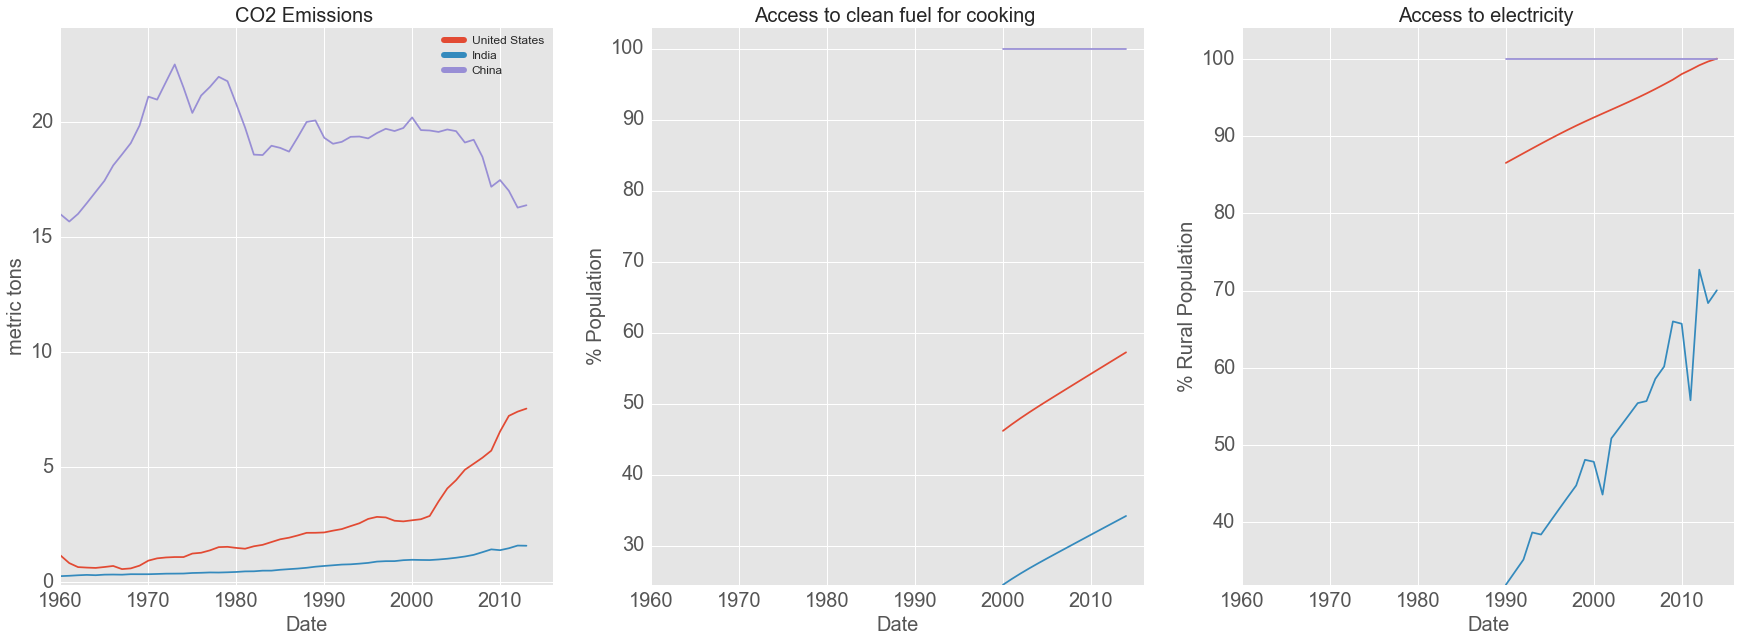

In [11]:
# Which countries?
countries = {'United States':'US','China':'CN','India':'IN'}

# Which features?
indicators = {'EN.ATM.CO2E.PC':'CO2 Emissions (metric tons)',
              'EG.ELC.ACCS.RU.ZS':'Access to electricity (% Rural Population)',
             'EG.CFT.ACCS.ZS':'Access to clean fuel for cooking (% Population)'}

# Generate figures
run_inquiry(indicators, countries)

## 2) Health (nutrition perspective) and GDP

Size of Data Set = 57 rows and 15 features


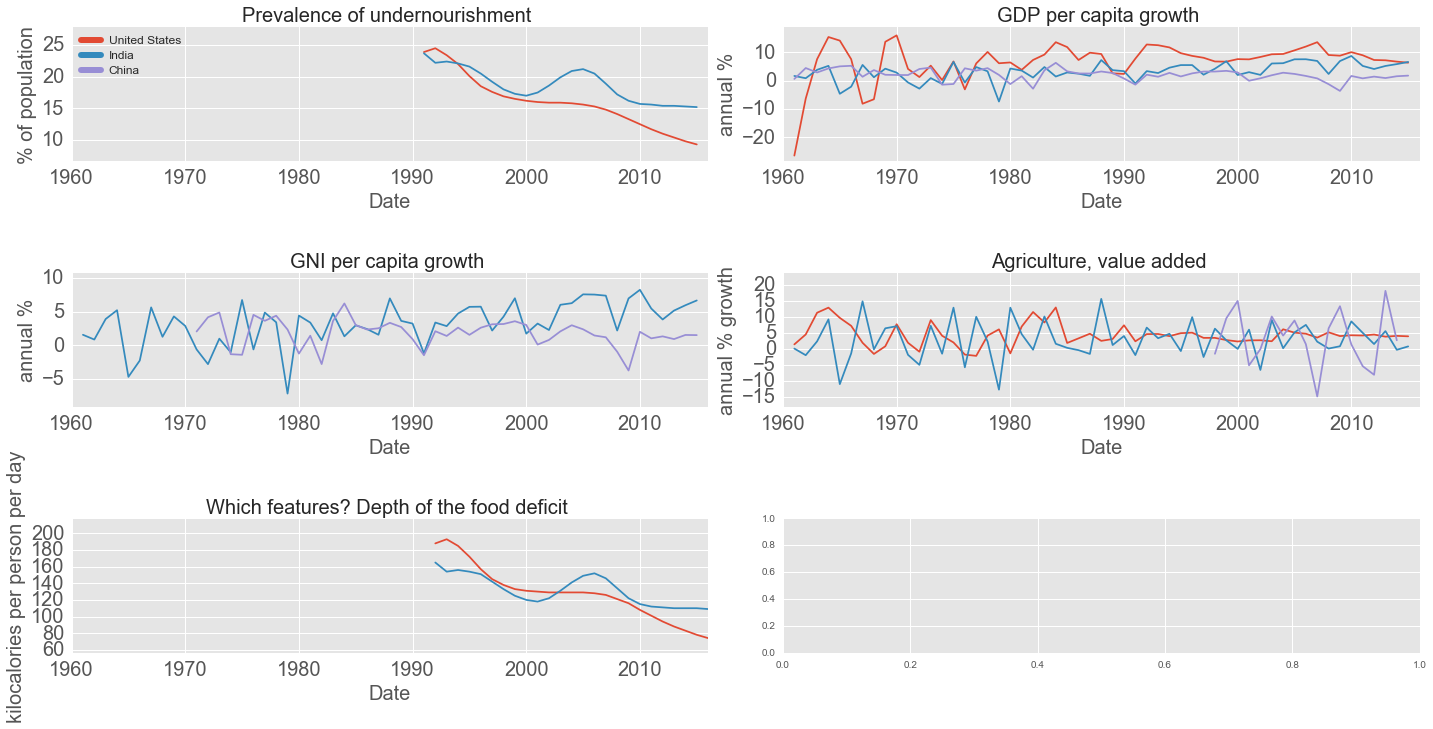

In [55]:
# Which countries?
countries = {'United States':'US','China':'CN','India':'IN'}

# Which features? 
indicators = {'SN.ITK.DFCT':'Which features? Depth of the food deficit (kilocalories per person per day)',
              'SN.ITK.DEFC.ZS':'Prevalence of undernourishment (% of population)',
             'NY.GDP.PCAP.KD.ZG':'GDP per capita growth (annual %)',
             'NY.GNP.PCAP.KD.ZG':'GNI per capita growth (annual %)',
             'NV.AGR.TOTL.KD.ZG':'Agriculture, value added (annual % growth)'}

# Generate figures
run_inquiry(indicators, countries)

# Plotting functions

In [28]:
def run_inquiry(indicators, countries):
    # Get data and unpack it
    wb_df = wbdata.get_dataframe(indicators, country=countries.values(), convert_date=True)
    wb_dfu = wb_df.unstack(level=0)
    print 'Size of Data Set = {} rows and {} features'.format(wb_dfu.shape[0], wb_dfu.shape[1])
    
    # Plotting routines
    if (len(indicators) == 4) | (len(indicators) == 9):
        inquiry_matrix_plot(indicators,countries,wb_dfu,square=True)
    elif len(indicators) <= 3:
        inquiry_row_plot(indicators,countries,wb_dfu)
    else:
        inquiry_matrix_plot(indicators,countries,wb_dfu,square=False)




In [41]:
def inquiry_row_plot(indicators,countries,wb_dfu):
    # Plot the data
    fig, ax = plt.subplots(1,len(indicators),figsize=(30,10))
    fig_titles = indicators.values()
    for i in range(len(indicators)):
        wb_dfu.plot(y=fig_titles[i],ax=ax[i],fontsize=20,legend=False)
        if i==0:
            legend = ax[i].legend(countries.keys(),loc='best')
            # Set the fontsize
            for label in legend.get_texts():
                label.set_fontsize('large')

            for label in legend.get_lines():
                label.set_linewidth(6)  # the legend line width
        # Find the position of open parenthese in title for ylabel
        ylabelindex_start = fig_titles[i].index('(') + 1
        ax[i].set_ylabel(fig_titles[i][ylabelindex_start:-1],fontsize=20)
        ax[i].set_title(fig_titles[i][:ylabelindex_start-1],fontsize=20)
        ax[i].set_xlabel('Date',fontsize=20)
        ax[i].set_ylim((wb_dfu[fig_titles[i]].min().min() - wb_dfu[fig_titles[i]].std().min(),
                        wb_dfu[fig_titles[i]].max().max() + wb_dfu[fig_titles[i]].std().median()))
    plt.tight_layout()

In [54]:
def inquiry_matrix_plot(indicators,countries,wb_dfu,square=True):
    if square==True:
        # Plot the data
        dims = int(np.sqrt(len(indicators)))
        fig, ax = plt.subplots(dims,dims,figsize=(20,20))
        
        fig_titles = indicators.values()
        count = 0
        for i in range(dims):
            for j in range(dims):
                # Plot figure
                wb_dfu.plot(y=[fig_titles[count]],ax=ax[i,j],fontsize=20,legend=False)
                
                # Plot Legend
                if count==0:
                    legend = ax[i,j].legend(countries.keys(),loc='best')
                    # Set the fontsize
                    for label in legend.get_texts():
                        label.set_fontsize('large')

                    for label in legend.get_lines():
                        label.set_linewidth(6)  
                
                # Figure asthetics
                # Find the position of open parenthese in title for ylabel
                ylabelindex_start = fig_titles[count].index('(') + 1
                ax[i,j].set_ylabel(fig_titles[count][ylabelindex_start:-1],fontsize=20)
                ax[i,j].set_title(fig_titles[count][:ylabelindex_start-1],fontsize=20)
                ax[i,j].set_xlabel('Date',fontsize=20)
                ax[i,j].set_ylim((wb_dfu[fig_titles[count]].min().min() - wb_dfu[fig_titles[count]].std().min(),
                                wb_dfu[fig_titles[count]].max().max() + wb_dfu[fig_titles[count]].std().median()))
                plt.tight_layout()
                # Update figure number
                count+=1
    elif square==False:
        # Plot the data
        if np.mod(len(indicators),2)==0:
            col_dims = int(gcd(2,len(indicators)))
            row_dims = int(len(indicators) / col_dims)
        else:
            col_dims = int(gcd(2,len(indicators)+1))
            row_dims = int((len(indicators)+1) / col_dims)
        fig, ax = plt.subplots(row_dims,col_dims,figsize=(20,10))
        
        fig_titles = indicators.values()
        count = 0
        for i in range(row_dims):
            for j in range(col_dims):
                if count < len(indicators):
                    # Plot figure
                    wb_dfu.plot(y=[fig_titles[count]],ax=ax[i,j],fontsize=20,legend=False)

                    # Plot Legend
                    if count==0:
                        legend = ax[i,j].legend(countries.keys(),loc='best')
                        # Set the fontsize
                        for label in legend.get_texts():
                            label.set_fontsize('large')

                        for label in legend.get_lines():
                            label.set_linewidth(6)  

                    # Figure asthetics
                    # Find the position of open parenthese in title for ylabel
                    ylabelindex_start = fig_titles[count].index('(') + 1
                    ax[i,j].set_ylabel(fig_titles[count][ylabelindex_start:-1],fontsize=20)
                    ax[i,j].set_title(fig_titles[count][:ylabelindex_start-1],fontsize=20)
                    ax[i,j].set_xlabel('Date',fontsize=20)
                    ax[i,j].set_ylim((wb_dfu[fig_titles[count]].min().min() - wb_dfu[fig_titles[count]].std().min(),
                                    wb_dfu[fig_titles[count]].max().max() + wb_dfu[fig_titles[count]].std().median()))
                    plt.tight_layout()
                    # Update figure number
                    count+=1        
    else:
        print('Error! Please choose to have square layout or not (True/False)')
        
